In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
using RiskSensitiveSAC

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/915ebe6f0e7302693bdd8eac985797dba1d25662/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/62f417f6ad727987c755549e9cd88c46578da562/build.log`


┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/kh-ryu/DRC_Project/DRC_Trajectron/Manifest.toml:0


┌ Info: Number of Julia Thread(s): 1
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:40


┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:41


In [14]:
include("$(@__DIR__)/../scripts/default_params/params_data_gaussian.jl");

dtr = 0.4;                                                                          # replanning time interval [s]
# dtc = 0.4;
tcalc = 0.2;                                                                        # pre-allocated control computation time [s] (< dtr)
sim_horizon = 16.0;                                                                 # simulation horizon [s]

model_dir = normpath(joinpath(@__DIR__, "../CrowdNav/crowd_nav/data/output_om_sarl_radius_0.4")) # directory of the trained policy
# model_dir = normpath(joinpath(@__DIR__, "../CrowdNav/crowd_nav/data/output")) # directory of the trained policy
env_config = "env.config"                                                           # environment config file name
policy_config = "policy.config"                                                     # policy config file name
policy_name = "sarl"                                                                # policy name

test_data_name = "hotel_test.pkl";                                                  # test data set name
test_scene_id = 0;                                                                  # test data id
start_time_idx = 401;                                                               # start time index in test data
ego_pos_init_vec = [-1.5, -8.5] .+ [-1.393743, 2.978962];                           # initial ego position [x, y] [m]
ego_pos_goal_vec = [3.5, 0.0]   .+ [-1.393743, 2.978962];                           # goal ego position [x, y] [m]
target_speed = 1.0;                                                                 # target speed [m/s]
sim_horizon = 10.0;                                                                 # simulation time horizon [s]


include("$(@__DIR__)/../scripts/parameter_setup_crowd_nav.jl");

In [15]:
scene_loader, controller, w_init, ado_inputs, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param, cnt_param,
                 cost_param=cost_param,
                 dtc=dtc,
                 prediction_steps=prediction_steps,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
CrowdNav Controller
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/hotel_test.pkl
Looking at the hotel_test.pkl sequence, data_id 0, start_idx 401


In [16]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec, target_speed,
                  measurement_schedule, target_trajectory, pos_error_replan, 
                  ado_inputs_init=ado_inputs);

┌ Warning: Time 0.00 [sec]: CrowdNav computation took 0.274 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87


┌ Warning: Time 0.40 [sec]: This evaluation iteration took 0.086 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 0.80 [sec]: CrowdNav computation took 0.798 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 0.80 [sec]: This evaluation iteration took 0.799 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 1.20 [sec]: CrowdNav computation took 0.233 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 1.20 [sec]: This evaluation iteration took 0.233 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 1.60 [sec]: CrowdNav computation took 0.476 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 1.60 [sec]: This evaluation iteration took 0.477 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 2.00 [sec]: This evaluation iteration took 0.152 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 2.40 [sec]: CrowdNav computation took 1.008 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 2.40 [sec]: This evaluation iteration took 1.008 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 2.80 [sec]: CrowdNav computation took 2.34 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 2.80 [sec]: This evaluation iteration took 2.34 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 3.20 [sec]: CrowdNav computation took 3.429 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 3.20 [sec]: This evaluation iteration took 3.429 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 3.60 [sec]: CrowdNav computation took 2.317 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 3.60 [sec]: This evaluation iteration took 2.317 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 4.00 [sec]: CrowdNav computation took 1.053 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 4.00 [sec]: This evaluation iteration took 1.053 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 4.40 [sec]: CrowdNav computation took 3.61 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 4.40 [sec]: This evaluation iteration took 3.61 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 4.80 [sec]: CrowdNav computation took 2.196 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 4.80 [sec]: This evaluation iteration took 2.196 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 5.20 [sec]: CrowdNav computation took 3.317 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 5.20 [sec]: This evaluation iteration took 3.317 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 5.60 [sec]: CrowdNav computation took 5.712 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 5.60 [sec]: This evaluation iteration took 5.712 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 6.00 [sec]: This evaluation iteration took 0.109 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 6.40 [sec]: This evaluation iteration took 0.146 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 6.80 [sec]: This evaluation iteration took 0.087 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 7.20 [sec]: This evaluation iteration took 0.123 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 7.60 [sec]: CrowdNav computation took 0.36 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 7.60 [sec]: This evaluation iteration took 0.36 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 8.00 [sec]: This evaluation iteration took 0.125 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 8.40 [sec]: CrowdNav computation took 0.429 [sec], which exceeds the maximum computation time allowed.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/crowd_nav_controller.jl:87
┌ Warning: Time 8.40 [sec]: This evaluation iteration took 0.429 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 8.80 [sec]: This evaluation iteration took 0.105 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 9.20 [sec]: This evaluation iteration took 0.13 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


┌ Warning: Time 9.60 [sec]: This evaluation iteration took 0.075 [sec], which exceeds dtc.
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:303


In [17]:
display_log(result.log)

Time 0.00 [sec]: New CrowdNav control computation is scheduled.
Time 0.00 [sec]: New CrowdNav control is available to the controller.
Time 0.00 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.02 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.04 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.06 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.08 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.10 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.12 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.14 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.16 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 0.18 [sec]: Control: [0.

Time 2.00 [sec]: New CrowdNav control is available to the controller.
Time 2.00 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.02 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.04 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.06 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.08 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.10 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.12 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.14 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.16 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 2.18 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.


Time 4.00 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.02 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.04 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.06 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.08 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.10 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.12 [sec]: Position deviation: 2.002. Target Trajectory is replanned.
Time 4.12 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.14 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.16 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the system.
Time 4.18 [sec]: Control: [0.9238795325112867, 0.3826834323650898] is applied to the sy

Time 6.00 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.02 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.04 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.06 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.08 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.10 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.12 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.14 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.16 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.18 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.20 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.22 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 6.24 [sec]: Control: [6

Time 8.32 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.34 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.36 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.38 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.40 [sec]: New measurement is obtained.
Time 8.40 [sec]: New CrowdNav control computation is scheduled.
Time 8.40 [sec]: New CrowdNav control is available to the controller.
Time 8.40 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.42 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.44 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.46 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.48 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.50 [sec]: Control: [6.123233995736766e-17, 1.0] is applied to the system.
Time 8.52 

In [18]:
result.total_cnt_cost

1.0000000000000007

In [19]:
result.total_pos_cost

100.41352371019887

In [20]:
result.total_col_cost

3.2263416766894712

In [21]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

104.63986538688835

In [22]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

1.2056076624006884

┌ Warning: No prediction is available with BIC or CrowdNav Controller
└ @ RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/utils.jl:778


Progress:   0%|▏                                        |  ETA: 0:01:23

Progress:  20%|████████▍                                |  ETA: 0:00:02

Progress:  37%|███████████████▏                         |  ETA: 0:00:02

Progress:  41%|████████████████▋                        |  ETA: 0:00:02

Progress:  52%|█████████████████████▍                   |  ETA: 0:00:01

Progress:  62%|█████████████████████████▌               |  ETA: 0:00:01

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:01

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


┌ Info: Saved animation to 
│   fn = /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/8_crowd_nav_data.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/8_crowd_nav_data.gif")
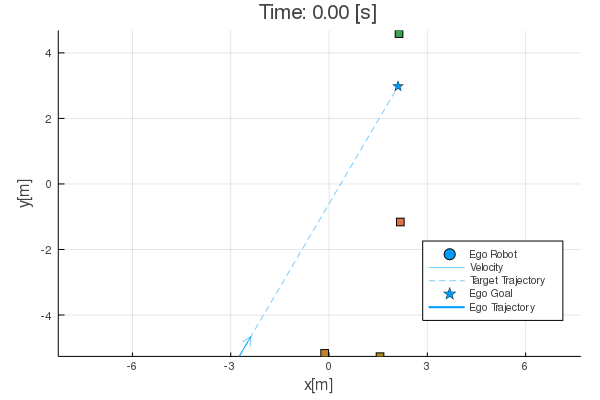

In [23]:
make_gif(result, dtplot=0.4, fps=2, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="8_crowd_nav_data.gif")

In [24]:
save("8_crowd_nav_data.jld2", "result", result)

Error encountered while save File{DataFormat{:JLD2}, String}("8_crowd_nav_data.jld2").

Fatal error:


CapturedException: type DataType has no field mutable
Stacktrace:
  [1] getproperty
    @ ./Base.jl:33 [inlined]
  [2] hasfielddata(T::Any, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:24
  [3] hasdata(T::DataType, encounteredtypes::Vector{DataType})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:32
  [4] hasdata
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:30 [inlined]
  [5] odr(#unused#::Type{RiskSensitiveSAC.CrowdNavEvaluationResult})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:563
  [6] objodr
    @ ~/.julia/packages/JLD2/qncOK/src/data/writing_datatypes.jl:109 [inlined]
  [7] write_dataset
    @ ~/.julia/packages/JLD2/qncOK/src/datasets.jl:541 [inlined]
  [8] write(g::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, name::String, obj::RiskSensitiveSAC.CrowdNavEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/groups.jl:119
  [9] write(f::JLD2.JLDFile{JLD2.MmapIO}, name::String, obj::RiskSensitiveSAC.CrowdNavEvaluationResult, wsession::JLD2.JLDWriteSession{Dict{UInt64, JLD2.RelOffset}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/JLD2.jl:347
 [10] (::JLD2.var"#62#63"{String, RiskSensitiveSAC.CrowdNavEvaluationResult, Tuple{}})(file::JLD2.JLDFile{JLD2.MmapIO})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:23
 [11] jldopen(::JLD2.var"#62#63"{String, RiskSensitiveSAC.CrowdNavEvaluationResult, Tuple{}}, ::String, ::Vararg{String}; kws::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:4
 [12] jldopen(::Function, ::String, ::String)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/loadsave.jl:1
 [13] save(::File{DataFormat{:JLD2}, String}, ::String, ::RiskSensitiveSAC.CrowdNavEvaluationResult; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:21
 [14] save(::File{DataFormat{:JLD2}, String}, ::String, ::RiskSensitiveSAC.CrowdNavEvaluationResult)
    @ JLD2 ~/.julia/packages/JLD2/qncOK/src/fileio.jl:17
 [15] invokelatest(::Any, ::Any, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ Base ./essentials.jl:729
 [16] invokelatest(::Any, ::Any, ::Vararg{Any})
    @ Base ./essentials.jl:726
 [17] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:219
 [18] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Formatted, ::String, ::RiskSensitiveSAC.CrowdNavEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:196
 [19] action(::Symbol, ::Vector{Union{Base.PkgId, Module}}, ::Symbol, ::String, ::String, ::Vararg{Any}; options::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185
 [20] action
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:185 [inlined]
 [21] #save#20
    @ ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:129 [inlined]
 [22] save(::String, ::String, ::RiskSensitiveSAC.CrowdNavEvaluationResult)
    @ FileIO ~/.julia/packages/FileIO/aP78L/src/loadsave.jl:125
 [23] top-level scope
    @ ~/DRC_Project/DRC_Trajectron/notebook/Eval_Example_8_CrowdNav_Data.ipynb:1